In [1]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import random

In [2]:
df=pd.read_csv('2_cropped_point_cloud.csv')

n=3000 # how many points you want

df1=df.sample(n)

# all the neccessary inputs
torch.manual_seed(1)

# set up the model and the training set 
model = nn.Linear(2,1)
valence=df1['x_coor']
energy=df1['y_coor']
x1_list=[]
x2_list=[]
x_list=[]

for i in df1.index:
    x1_list.append(valence[i])
    x2_list.append(energy[i])
    x_list.append([int(valence[i]),int(energy[i])])

x_train = torch.FloatTensor(x_list)

popularity=df1['z_coor']
y_list=[]

for i in popularity:
    y_list.append([int(i)])

y_train = torch.FloatTensor(y_list)

optimizer = torch.optim.SGD(model.parameters(), lr=0.000000001) 

In [3]:
# actual learning process
nb_epochs = 100000
for epoch in range(nb_epochs+1):

    # H(x)
    prediction = model(x_train)

    # finding the cost
    cost = F.mse_loss(prediction, y_train) 

    # reset the gradient
    optimizer.zero_grad()
    cost.backward()
    # update W and b
    optimizer.step()

    # print to show
    if epoch % 10000 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))
        print(list(model.parameters()))

Epoch    0/100000 Cost: 1570048.375000
[Parameter containing:
tensor([[ 0.3727, -0.3088]], requires_grad=True), Parameter containing:
tensor([-0.1371], requires_grad=True)]


Epoch 10000/100000 Cost: 26892.080078
[Parameter containing:
tensor([[0.3771, 0.5852]], requires_grad=True), Parameter containing:
tensor([-0.1365], requires_grad=True)]
Epoch 20000/100000 Cost: 14760.821289
[Parameter containing:
tensor([[0.2591, 0.9009]], requires_grad=True), Parameter containing:
tensor([-0.1363], requires_grad=True)]
Epoch 30000/100000 Cost: 12788.303711
[Parameter containing:
tensor([[0.2115, 1.0281]], requires_grad=True), Parameter containing:
tensor([-0.1361], requires_grad=True)]
Epoch 40000/100000 Cost: 12467.633789
[Parameter containing:
tensor([[0.1923, 1.0794]], requires_grad=True), Parameter containing:
tensor([-0.1361], requires_grad=True)]
Epoch 50000/100000 Cost: 12415.389648
[Parameter containing:
tensor([[0.1846, 1.1001]], requires_grad=True), Parameter containing:
tensor([-0.1361], requires_grad=True)]
Epoch 60000/100000 Cost: 12406.862305
[Parameter containing:
tensor([[0.1814, 1.1085]], requires_grad=True), Parameter containing:
tensor([-0.1361], r

predicted value for [80,75] : tensor([[97.7435]], grad_fn=<AddmmBackward0>)
0.17952707409858704 1.1135650873184204 -0.13605909049510956


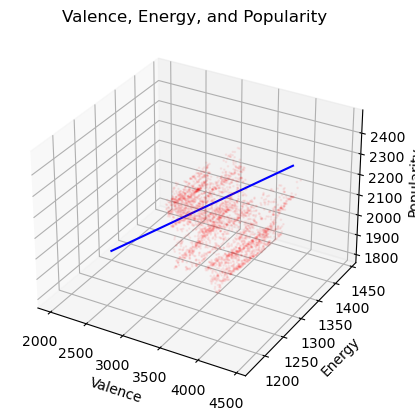

In [4]:
new_var =  torch.FloatTensor([[80,75]]) 
pred_y = model(new_var) 
print("predicted value for [80,75] :", pred_y) 

# data for plotting
w1_final = float(list(model.parameters())[0].data.numpy()[0][0])
w2_final = float(list(model.parameters())[0].data.numpy()[0][1])
b_final = float(list(model.parameters())[1].data.numpy()[0])
print(w1_final, w2_final, b_final)
y_plot_list=[]
for i in x_train:
    y_plot_list.append(model(i))

fig = plt.figure()
ax = plt.axes(projection='3d')

# 3d lines
xline = np.linspace(2000,4000,100)
yline = np.linspace(1300,1400,100)
zline = xline*w1_final + yline*w2_final + b_final
ax.plot3D(xline, yline, zline, 'blue')

x_plot=[]
y_plot=[]
z_plot=[]
s_color = []
for i in range(len(x_list)):
    x_plot.append(x_list[i][0])
    y_plot.append(x_list[i][1])
    z_plot.append(y_list[i])
    s_color.append(1)

# 3d points
s=ax.scatter3D(x_plot, y_plot, z_plot, c="r", s=s_color, alpha=0.05)
s.set_edgecolors = s.set_facecolors = lambda *args:None

ax.set_title("Valence, Energy, and Popularity")
ax.set_xlabel("Valence")
ax.set_ylabel("Energy")
ax.set_zlabel("Popularity")
plt.show()

In [5]:
model.state_dict()

OrderedDict([('weight', tensor([[0.1795, 1.1136]])),
             ('bias', tensor([-0.1361]))])

In [6]:
y1 = float(model(torch.FloatTensor([[0,1]])))
y2 = float(model(torch.FloatTensor([[0,2]])))

In [7]:
# magnitude(cross(A - B, C - B)) / magnitude(C - B)
# A = np.array([1,2,3])
# B = np.array([0,1,float(model(torch.FloatTensor([[0,1]])))])
# C = np.array([0,2,float(model(torch.FloatTensor([[0,2]])))])
# np.linalg.norm(np.cross(np.subtract(C,B), np.subtract(C,B))) / np.linalg.norm(np.subtract(C,B))

NameError: name 'magnitude' is not defined